In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)


Num GPUs Available:  1


In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Using mobilenet

In [11]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [12]:
def prepare_image(file):
    img_path = 'images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

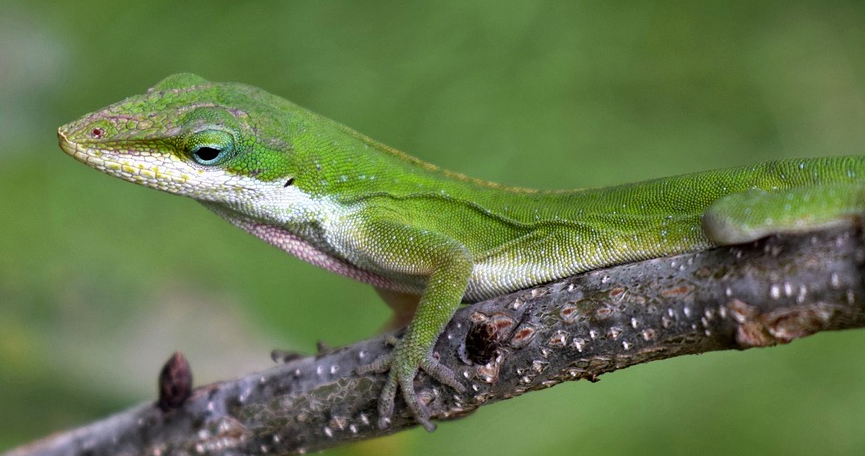

In [13]:
from IPython.display import Image
Image(filename='images/1.PNG', width=300,height=200) 

In [14]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)

In [15]:
results = imagenet_utils.decode_predictions(predictions)

In [16]:
results

[[('n01682714', 'American_chameleon', 0.5843147),
  ('n01693334', 'green_lizard', 0.2785562),
  ('n01687978', 'agama', 0.13019584),
  ('n01689811', 'alligator_lizard', 0.0047072913),
  ('n01688243', 'frilled_lizard', 0.0016176497)]]

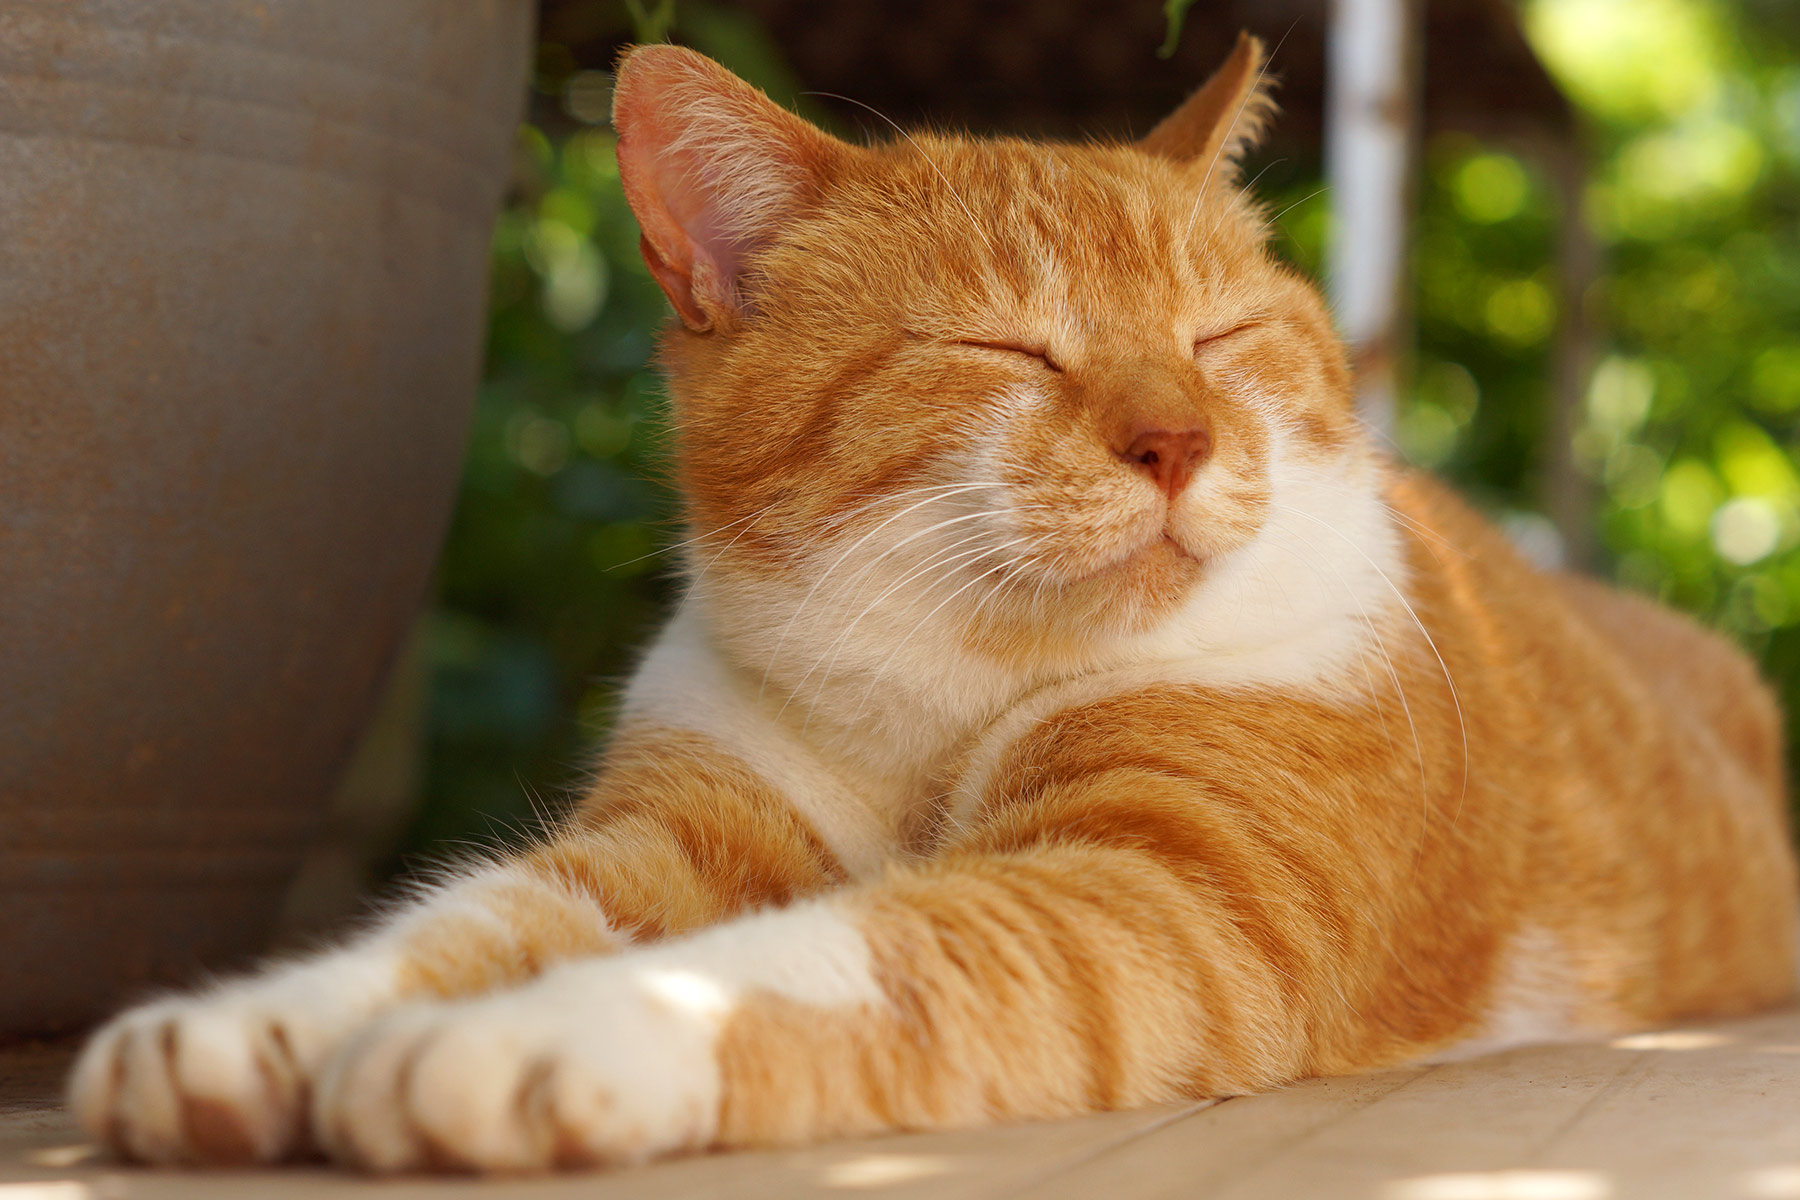

In [17]:
from IPython.display import Image
Image(filename='images/2.jpg', width=300,height=200) 

In [18]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)

In [19]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02123159', 'tiger_cat', 0.84387994),
  ('n02127052', 'lynx', 0.12505162),
  ('n02124075', 'Egyptian_cat', 0.016588803),
  ('n02123045', 'tabby', 0.0095779365),
  ('n03775546', 'mixing_bowl', 0.00074206456)]]

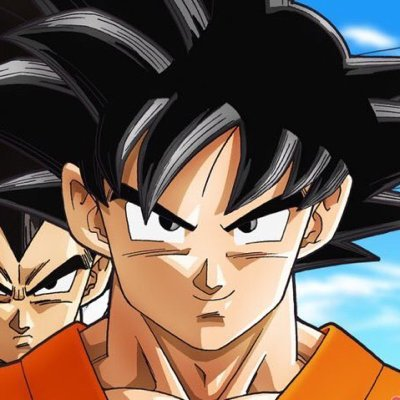

In [22]:
from IPython.display import Image
Image(filename='images/3.jpg', width=300,height=200) 


In [23]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n06596364', 'comic_book', 0.56160796),
  ('n03724870', 'mask', 0.08810053),
  ('n02974003', 'car_wheel', 0.0725635),
  ('n03127747', 'crash_helmet', 0.061047982),
  ('n02514041', 'barracouta', 0.012520362)]]

VGG16

In [24]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 143s 0us/step


In [25]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

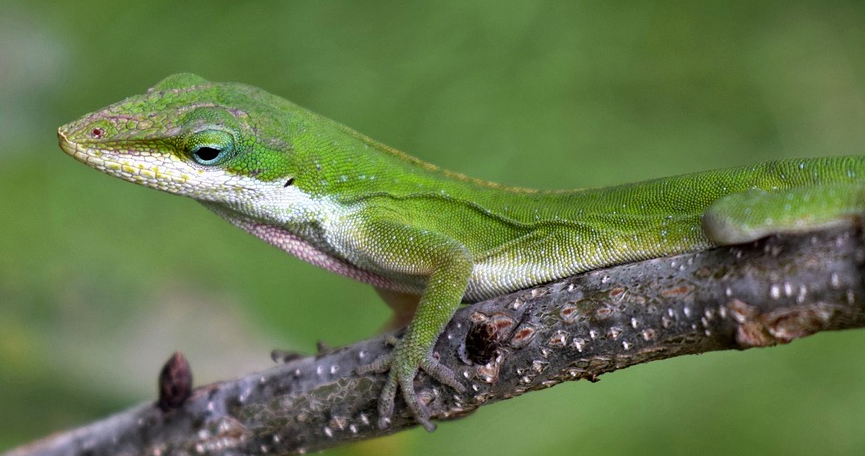

In [37]:
from keras.preprocessing.image import load_img
image = load_img('images/1.png', target_size=(224, 224))
from IPython.display import Image
Image(filename='images/1.png', width=300,height=200) 

In [38]:

from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
yhat = vgg16_model.predict(image)

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

green_lizard (59.24%)


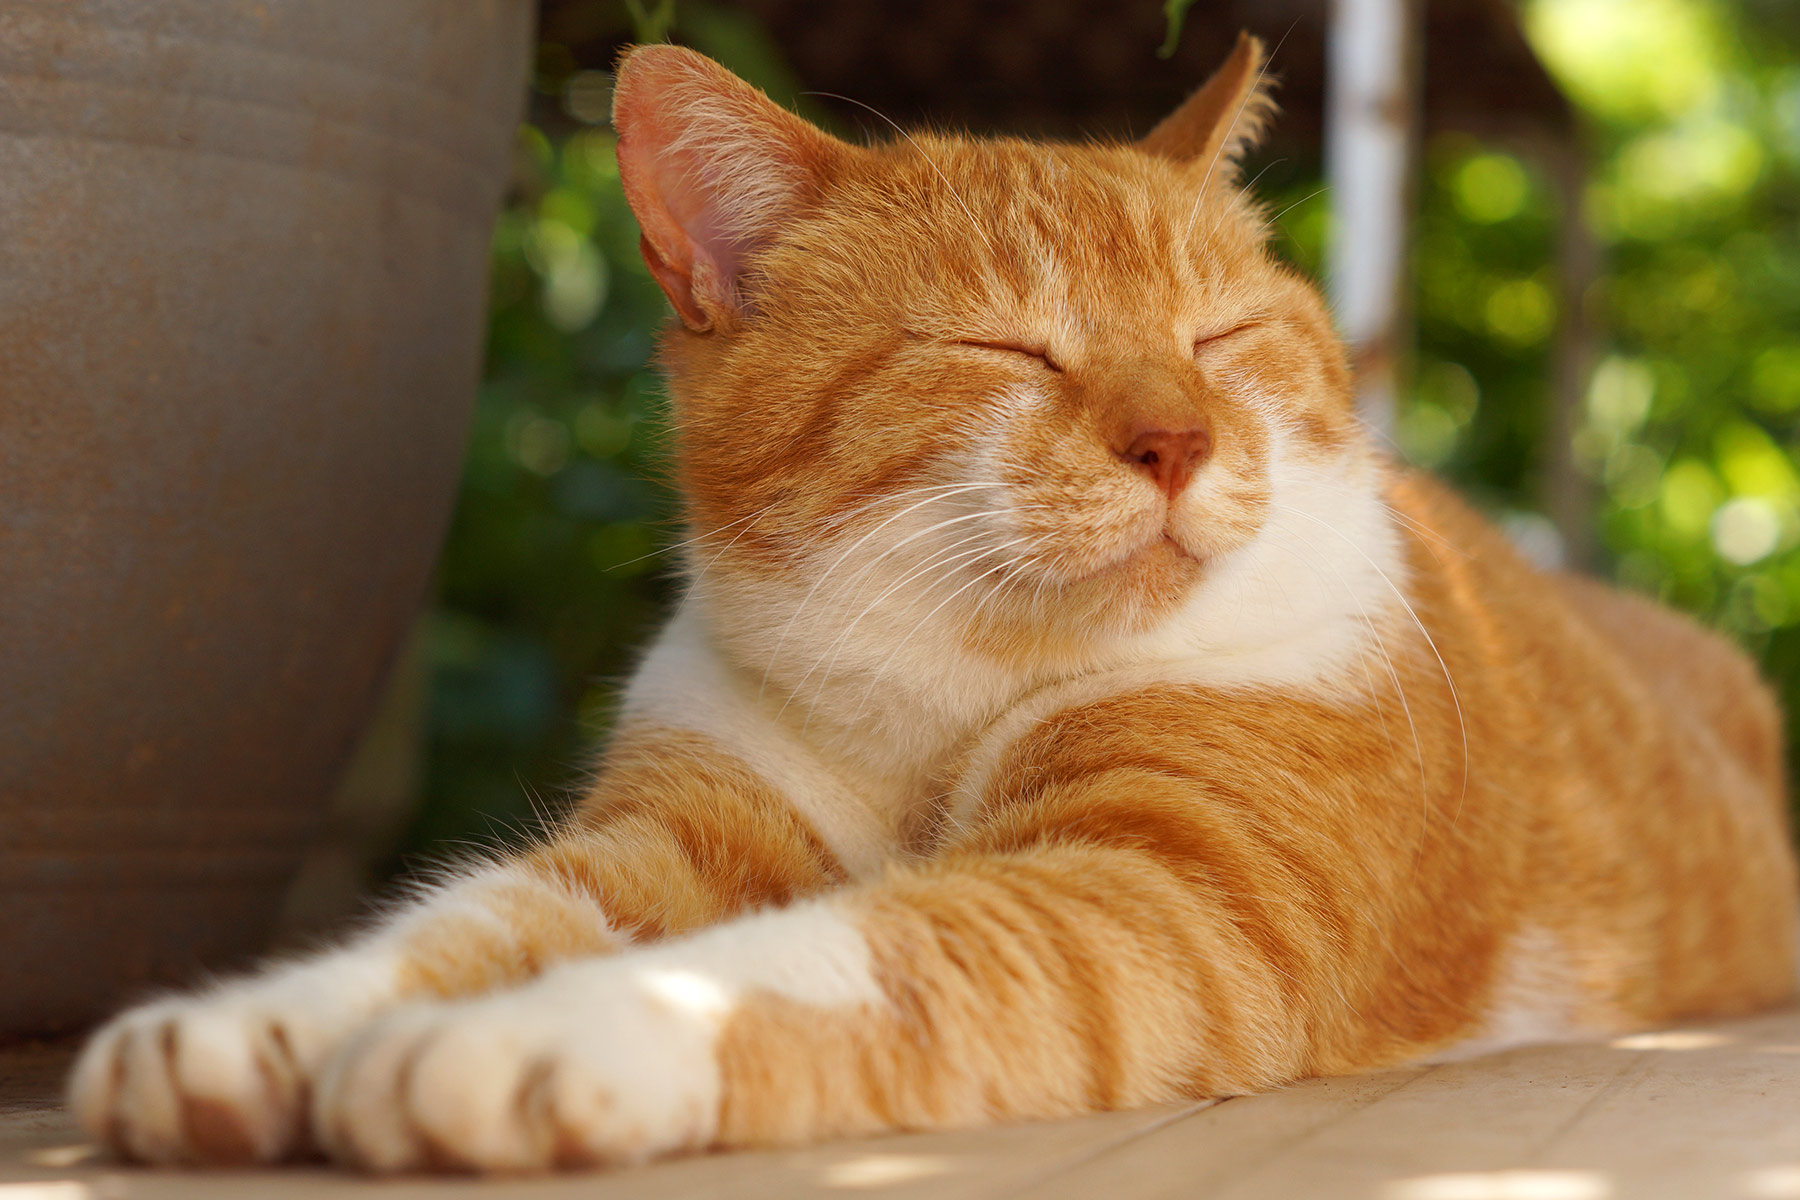

In [39]:
from keras.preprocessing.image import load_img
image = load_img('images/2.jpg', target_size=(224, 224))
from IPython.display import Image
Image(filename='images/2.jpg', width=300,height=200) 

In [40]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
yhat = vgg16_model.predict(image)

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (57.14%)


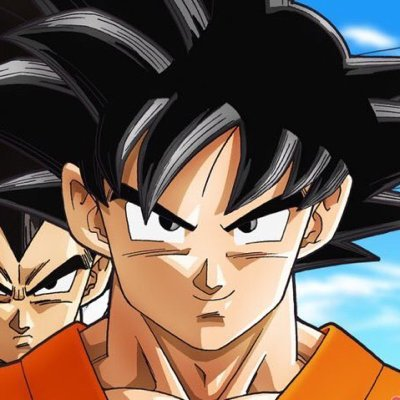

In [41]:
from keras.preprocessing.image import load_img
image = load_img('images/3.jpg', target_size=(224, 224))
from IPython.display import Image
Image(filename='images/3.jpg', width=300,height=200) 

In [42]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
yhat = vgg16_model.predict(image)

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

pinwheel (25.09%)


Freezing layers

In [45]:

for layer in vgg16_model.layers:
    print(layer, layer.trainable)



<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001BE307924C0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE416AB700> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE91230AF0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BE9123D4F0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE91242A60> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE912428E0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BE91230970> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE87DA52B0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE87D8BA00> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE87D93070> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BE91230130> True
<tensorflow.python.keras.layer

In [49]:
# 50 %
for layer in vgg16_model.layers[10:]:

    layer.trainable = False


for layer in vgg16_model.layers:
    print(layer, layer.trainable)


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001BE307924C0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE416AB700> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE91230AF0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BE9123D4F0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE91242A60> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE912428E0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BE91230970> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE87DA52B0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE87D8BA00> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BE87D93070> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BE91230130> False
<tensorflow.python.keras.laye

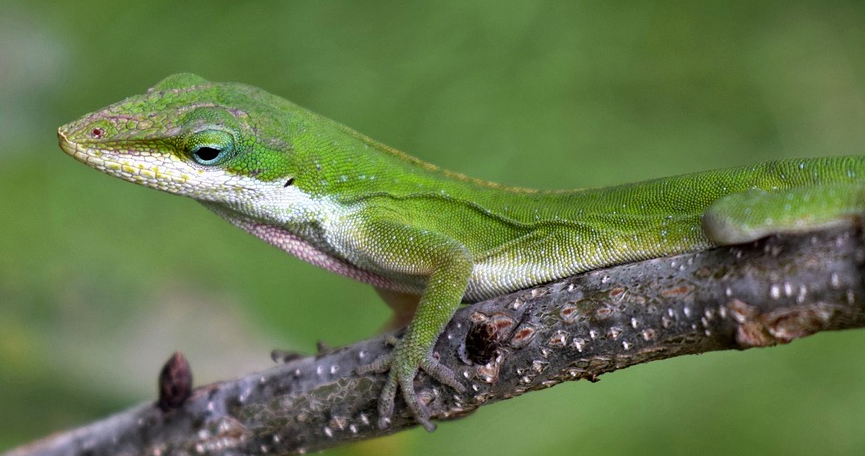

In [50]:
from keras.preprocessing.image import load_img
image = load_img('images/1.png', target_size=(224, 224))
from IPython.display import Image
Image(filename='images/1.png', width=300,height=200) 

In [51]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
yhat = vgg16_model.predict(image)

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

green_lizard (59.24%)
